<a href="https://colab.research.google.com/github/nbartha/1st/blob/main/Project1_AER850.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded. Shape: (860, 4)
       X       Y     Z  Step
0  9.375  3.0625  0.50     1
1  9.375  3.0625  0.51     1
2  9.375  3.0625  0.52     1
3  9.375  3.0625  0.53     1
4  9.375  3.0625  0.54     1

--- Step 2.2: Data Visualization ---
Visualizing feature distributions and relationships.


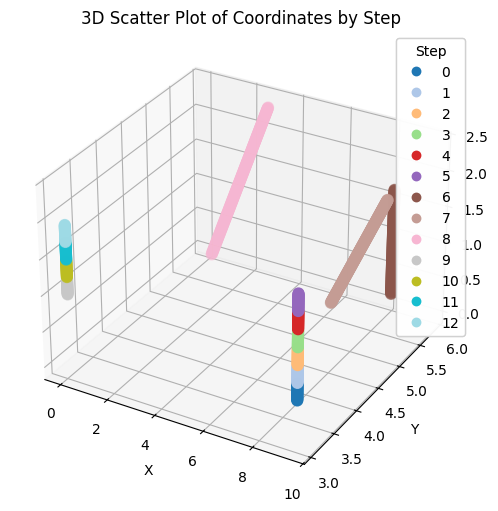

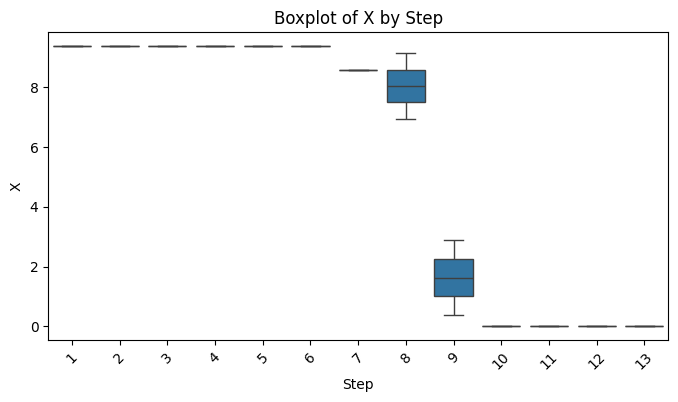

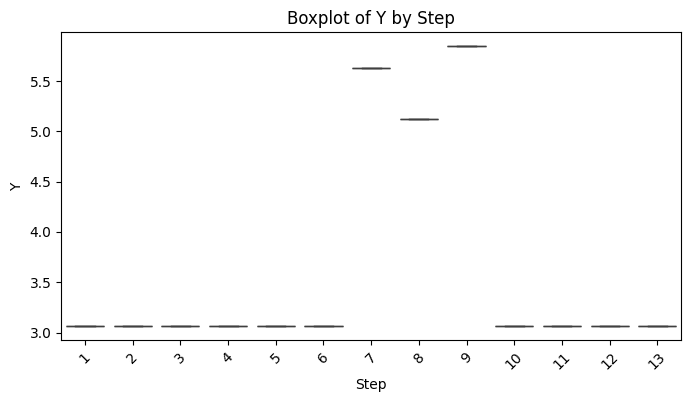

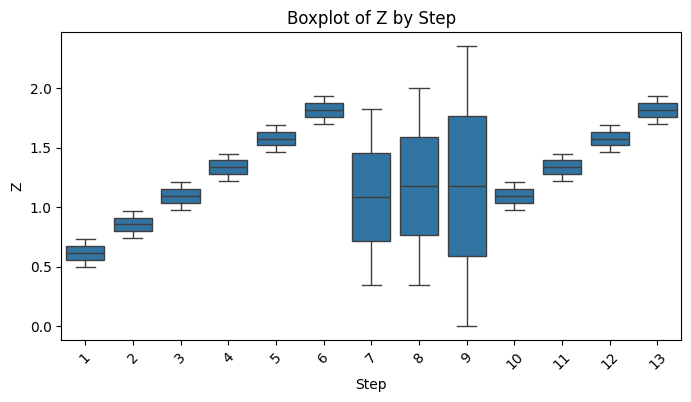

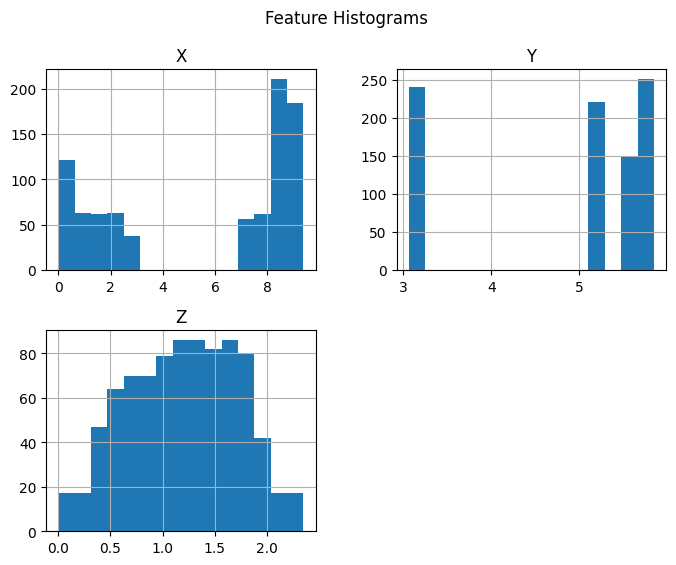

Step 2.2 plots generated and saved. Boxplots help identify outliers, spread, and clustering. 3D scatter helps visualize separability between steps.

--- Step 2.3: Correlation Analysis ---


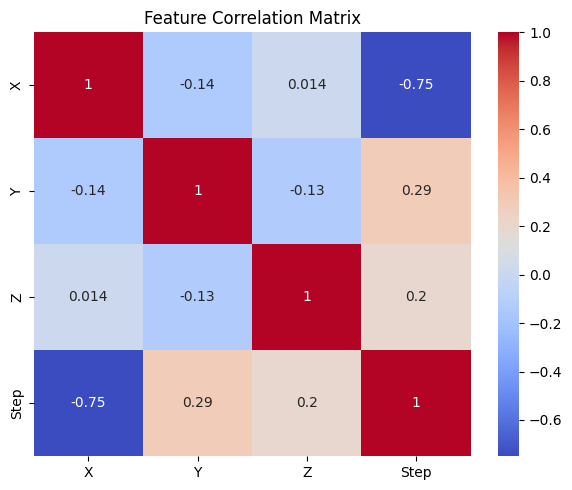

Correlation between X and Step: -0.7499
Correlation between Y and Step: 0.2928
Correlation between Z and Step: 0.1995
Pearson correlation indicates how strongly each feature is linearly related to the target.

--- Step 2.4: Classification Model Development ---

RandomForest Results:
Best Params: {'clf__max_depth': None, 'clf__n_estimators': 50}
Accuracy=0.9884, Precision_macro=0.9744, F1_macro=0.9665
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       0.83      1.00      0.91         5
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        44
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00         5
 

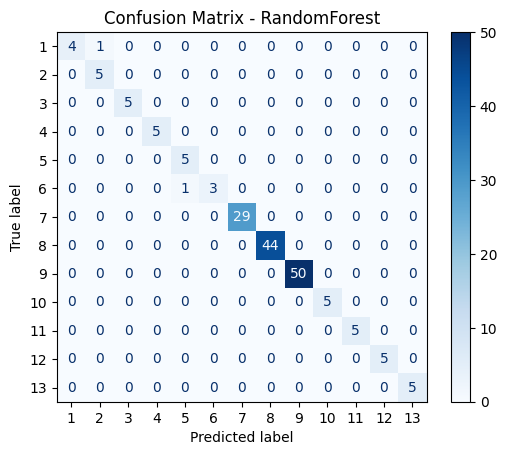


SVC Results:
Best Params: {'clf__C': 1, 'clf__kernel': 'linear'}
Accuracy=1.0000, Precision_macro=1.0000, F1_macro=1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        44
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted av

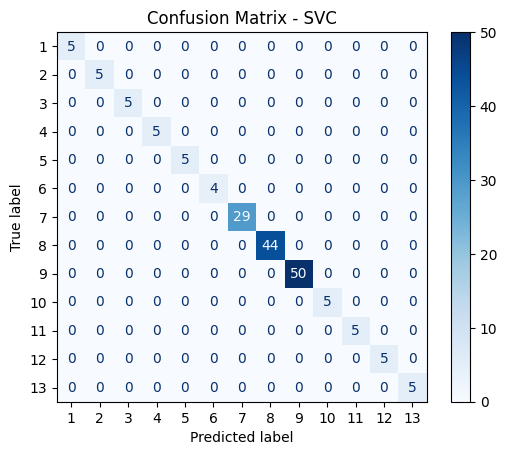


KNN Results:
Best Params: {'clf__n_neighbors': 5, 'clf__weights': 'distance'}
Accuracy=0.9826, Precision_macro=0.9615, F1_macro=0.9509
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       0.83      1.00      0.91         5
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        44
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         5

    accuracy                           0.98       172
   macro avg       0.96      0.95      0.95       17

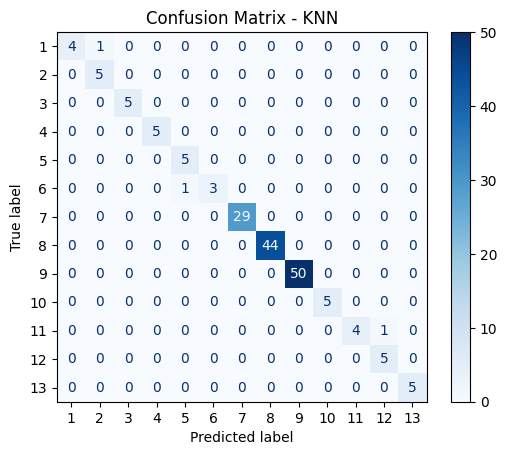


GradientBoosting Results:
Best Params: {'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.01}
Accuracy=0.9942, Precision_macro=0.9872, F1_macro=0.9820
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       0.83      1.00      0.91         5
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        44
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5

    accuracy                           0.99       172
   macro avg       0.99      0

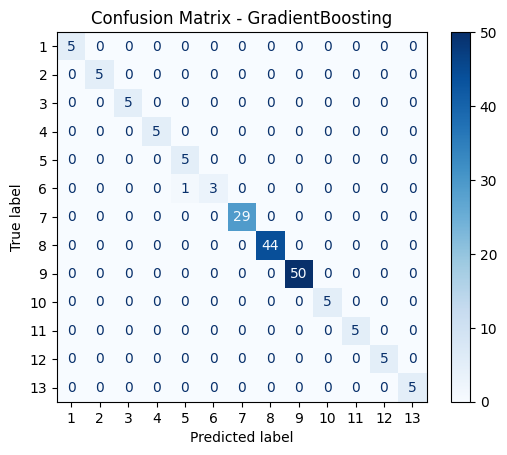

Models trained. GridSearchCV finds best hyperparameters for RF, SVC, KNN. RandomizedSearchCV efficiently searches GB hyperparameters.

--- Step 2.6: Stacked Model Performance ---
Stacked Model Performance: Accuracy=0.9942, Precision_macro=0.9872, F1_macro=0.9845


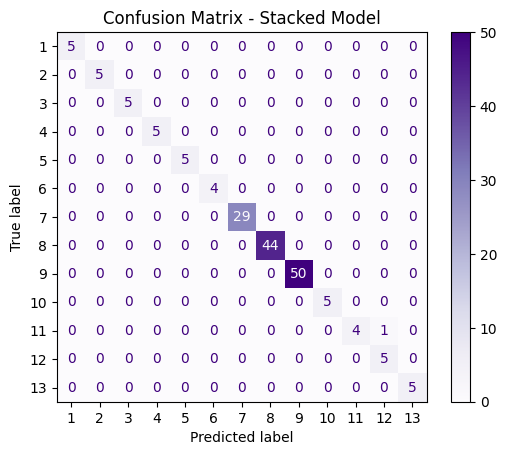

Stacked model combines RF + SVC to leverage complementary strengths.

Stacked model saved as 'selected_model.joblib'

Predictions for new coordinates:
[9.375  3.0625 1.51  ] -> Step 5
[6.995  5.125  0.3875] -> Step 8
[0.     3.0625 1.93  ] -> Step 13
[9.4 3.  1.8] -> Step 6
[9.4 3.  1.3] -> Step 4


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# =========================================================
# Project 1: ML-based Step Prediction
# Steps 2.2 to 2.7 – Full Script
# =========================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from joblib import dump

# ----------------------
# Step 2.1 – Load Data
# ----------------------
data_path = "Project 1 Data.csv"
df = pd.read_csv(data_path)
features = ['X', 'Y', 'Z']
target = 'Step'

print(f"Data loaded. Shape: {df.shape}")
print(df.head())

# Encode target for ML
le = LabelEncoder()
y_enc = le.fit_transform(df[target])
X = df[features]

# Create plots directory
os.makedirs("plots", exist_ok=True)

# =========================================================
# Step 2.2: Data Visualization
# =========================================================
print("\n--- Step 2.2: Data Visualization ---")
print("Visualizing feature distributions and relationships.")

# 3D Scatter Plot – X, Y, Z colored by Step
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['X'], df['Y'], df['Z'], c=y_enc, cmap='tab20', s=60)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("3D Scatter Plot of Coordinates by Step")
legend1 = ax.legend(*scatter.legend_elements(), title="Step")
ax.add_artist(legend1)
plt.savefig("plots/3D_scatter_steps.png")
plt.show()
plt.close()

# Boxplots for each feature per Step
for col in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Step', y=col, data=df)
    plt.title(f"Boxplot of {col} by Step")
    plt.xticks(rotation=45)
    plt.savefig(f"plots/boxplot_{col}.png")
    plt.show()
    plt.close()

# Histograms for feature distributions
df[features].hist(figsize=(8,6), bins=15)
plt.suptitle("Feature Histograms")
plt.savefig("plots/feature_histograms.png")
plt.show()
plt.close()

print("Step 2.2 plots generated and saved. Boxplots help identify outliers, spread, and clustering. 3D scatter helps visualize separability between steps.")

# =========================================================
# Step 2.3: Correlation Analysis
# =========================================================
print("\n--- Step 2.3: Correlation Analysis ---")
corr = df.corr(method='pearson')
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.savefig("plots/correlation_matrix.png")
plt.show()
plt.close()

for f in features:
    print(f"Correlation between {f} and Step: {corr.loc[f, target]:.4f}")
print("Pearson correlation indicates how strongly each feature is linearly related to the target.")

# =========================================================
# Step 2.4: Classification Model Development
# =========================================================
print("\n--- Step 2.4: Classification Model Development ---")
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, stratify=y_enc, random_state=42)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

def evaluate_model(name, estimator, params, randomized=False):
    """Trains, tunes, evaluates a model, prints metrics and saves confusion matrix"""
    if randomized:
        search = RandomizedSearchCV(estimator, params, cv=cv, n_iter=5, n_jobs=-1, scoring='f1_macro', random_state=42)
    else:
        search = GridSearchCV(estimator, params, cv=cv, n_jobs=-1, scoring='f1_macro')
    search.fit(X_train, y_train)
    best = search.best_estimator_
    y_pred = best.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    print(f"\n{name} Results:")
    print(f"Best Params: {search.best_params_}")
    print(f"Accuracy={acc:.4f}, Precision_macro={prec:.4f}, F1_macro={f1:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.savefig(f"plots/confmat_{name}.png")
    plt.show()
    plt.close()

    return best, f1

# Define models and hyperparameters
rf_pipe = Pipeline([("scaler", StandardScaler()), ("clf", RandomForestClassifier(random_state=42))])
rf_params = {"clf__n_estimators": [50, 100], "clf__max_depth": [None, 10, 20]}

svc_pipe = Pipeline([("scaler", StandardScaler()), ("clf", SVC(random_state=42))])
svc_params = {"clf__C": [0.1, 1, 10], "clf__kernel": ["rbf", "linear"]}

knn_pipe = Pipeline([("scaler", StandardScaler()), ("clf", KNeighborsClassifier())])
knn_params = {"clf__n_neighbors": [3,5,7], "clf__weights": ["uniform","distance"]}

gb_params = {"n_estimators": [50,100,150], "max_depth": [2,3,4], "learning_rate": [0.01,0.05,0.1]}

# Train & evaluate
models = {}
models["RandomForest"], _ = evaluate_model("RandomForest", rf_pipe, rf_params)
models["SVC"], _ = evaluate_model("SVC", svc_pipe, svc_params)
models["KNN"], _ = evaluate_model("KNN", knn_pipe, knn_params)
models["GradientBoosting"], _ = evaluate_model("GradientBoosting", GradientBoostingClassifier(random_state=42), gb_params, randomized=True)

print("Models trained. GridSearchCV finds best hyperparameters for RF, SVC, KNN. RandomizedSearchCV efficiently searches GB hyperparameters.")

# =========================================================
# Step 2.6: Stacked Model Performance
# =========================================================
print("\n--- Step 2.6: Stacked Model Performance ---")
estimators = [("rf", models["RandomForest"]), ("svc", models["SVC"])]
stacked = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000))
stacked.fit(X_train, y_train)

y_pred_stacked = stacked.predict(X_test)
acc = accuracy_score(y_test, y_pred_stacked)
prec = precision_score(y_test, y_pred_stacked, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_stacked, average='macro', zero_division=0)
print(f"Stacked Model Performance: Accuracy={acc:.4f}, Precision_macro={prec:.4f}, F1_macro={f1:.4f}")

cm = confusion_matrix(y_test, y_pred_stacked)
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - Stacked Model")
plt.savefig("plots/confmat_stacked.png")
plt.show()
plt.close()
print("Stacked model combines RF + SVC to leverage complementary strengths.")

# =========================================================
# Step 2.7: Save Model & Predict New Coordinates
# =========================================================
dump({"model": stacked, "label_encoder": le, "features": features}, "selected_model.joblib")
print("\nStacked model saved as 'selected_model.joblib'")

new_coords = np.array([
    [9.375,3.0625,1.51],
    [6.995,5.125,0.3875],
    [0,3.0625,1.93],
    [9.4,3,1.8],
    [9.4,3,1.3]
])
preds = stacked.predict(new_coords)
decoded_preds = le.inverse_transform(preds)

print("\nPredictions for new coordinates:")
for coord, label in zip(new_coords, decoded_preds):
    print(f"{coord} -> Step {label}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')